# Import Dependencies

In [1]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# ML metrics testing
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Data wrangling dependencies
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize a Mongo connection

In [2]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client.education_data

# Import Data into DF

In [3]:
mycol = db["education_data"]
cursor = mycol.find()

# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(cursor))

# Delete the _id
del df['_id']

# Make the school name values all lower-case
df["SCHOOL_NAME"] = df["SCHOOL_NAME"].str.lower()
df = df.dropna()

distric_wide_df = df.loc[df['SUBGROUP'] == "Districtwide"]

In [4]:
df["SUBGROUP"].unique()

array(['White', 'Districtwide', 'Schoolwide', 'Students with Disability',
       'Economically Disadvantaged', 'Black', 'Black or African American',
       'Hispanic', 'Students with Disabilities', 'Male', 'Female',
       'Asian', 'Limited English Proficiency', 'English Learners',
       'Two or More Races', 'Homeless', 'Foster Care', 'Native Hawaiian',
       'Native Hawaiian or Pacific Islander'], dtype=object)

# Single Regression Models
In this section, we create two univariate regression models to explore whether or not a districts's budget or the median household income has a direct correlation with graduation rates.

R^2 score for single regression model: 0.2909776137877613


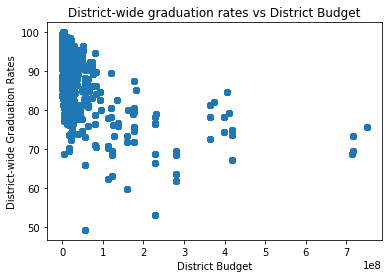

In [5]:
X = distric_wide_df.DISTRICT_BUDGET.values.reshape(-1, 1)
y = distric_wide_df.FOUR_YR_GRAD_RATE.values.reshape(-1, 1)
plt.scatter(X,y)
plt.title("District-wide graduation rates vs District Budget")
plt.xlabel("District Budget")
plt.ylabel("District-wide Graduation Rates")

# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(f"R^2 score for single regression model: {linear_model.score(X_test, y_test)}")

R^2 score for single regression model: 0.2393552955937369


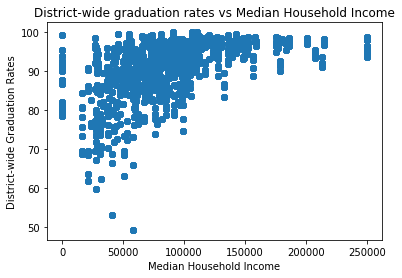

In [6]:
X = distric_wide_df.Median_household_income.values.reshape(-1, 1)
y = distric_wide_df.FOUR_YR_GRAD_RATE.values.reshape(-1, 1)
plt.scatter(X,y)
plt.title("District-wide graduation rates vs Median Household Income")
plt.xlabel("Median Household Income")
plt.ylabel("District-wide Graduation Rates")

# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(f"R^2 score for single regression model: {linear_model.score(X_test, y_test)}")

# Multiple Regression Models
This section includes 3 models and compares their scores with one another to see which features affect the graduation rates the most.  These multiple regression models all try and predictgraduation rates with features as follows:
1. District budget, median household income, and population
2. District budget and median household 
3. District budget and population

Model (1) had the highest score, so will be the model we use for the residual plot, but our model tells us that median household income and district budget are important factors in determing graduation success.

Graduation rate vs district budget, median household income, and population

In [7]:
X_full = distric_wide_df[["DISTRICT_BUDGET", "Median_household_income", "Population"]]
y_full = distric_wide_df.FOUR_YR_GRAD_RATE.values.reshape(-1, 1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full,y_full, random_state = 42)


mr_model_full = LinearRegression()
mr_model_full.fit(X_train_full, y_train_full)
print(f"R^2 score for Testing Data: {mr_model_full.score(X_test_full, y_test_full)}")
print(f"R^2 score for Training Data: {mr_model_full.score(X_train_full, y_train_full)}")

R^2 score for Testing Data: 0.42476762312714617
R^2 score for Training Data: 0.40520694283614667


Graduation rate vs district budget and median household

In [8]:
X = distric_wide_df[["Median_household_income", "DISTRICT_BUDGET"]]
y = distric_wide_df.FOUR_YR_GRAD_RATE.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)


mr_model_income = LinearRegression()
mr_model_income.fit(X_train, y_train)
print(f"R^2 score for Testing Data: {mr_model_income.score(X_test, y_test)}")
print(f"R^2 score for Training Data: {mr_model_income.score(X_train, y_train)}")

R^2 score for Testing Data: 0.40717025619710134
R^2 score for Training Data: 0.3833958335809021


Graduation rate vs district budget and population

In [9]:
X = distric_wide_df[["Population", "DISTRICT_BUDGET"]]
y = distric_wide_df.FOUR_YR_GRAD_RATE.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)


mr_model_population = LinearRegression()
mr_model_population.fit(X_train, y_train)
print(f"R^2 score for Testing Data: {mr_model_population.score(X_test, y_test)}")
print(f"R^2 score for Training Data: {mr_model_population.score(X_train, y_train)}")

R^2 score for Testing Data: 0.31085849897472284
R^2 score for Training Data: 0.29721122609349415


# Residuals Plot
Based on this residual plot, we can make the following conclusions:
* There are a few outliers in the dataset, which shows the model isn't perfect, as these outliers are pulling the regression line
* There is a lack of symmetry in earlier data points
    * Residual plots assume constant variance, so there should be symmetry throughout the plot, but we only see symmetry towards the latter half of the plot.
* There is also a clusting of data points in the 85% and higher section of the graph.  This section of the graph is definitely heteroscedastic
    * A heteroscedastic model will have a cone shape
        * Simply put, the variablity of the dependent variables widen or narrow as the values of the independent variables increase
    * Regression models assume homoscedasticty, so this is definitely bad
        * If a regression model is consistently accurate when it predicts high values of the DV (high graduation rates), but highly inconsistent in accuracy when it predicts low values, (low graduation rates) then the results of that regression should not be trusted

Text(0.5, 1.0, 'Residual Plot')

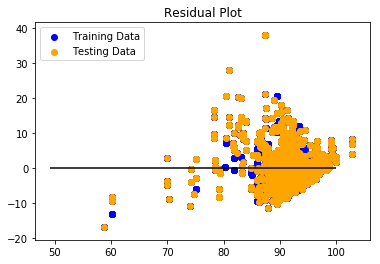

In [10]:
plt.scatter(mr_model_full.predict(X_train_full), mr_model_full.predict(X_train_full) - y_train_full, c="blue", label="Training Data")
plt.scatter(mr_model_full.predict(X_test_full), mr_model_full.predict(X_test_full) - y_test_full, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_full.min(), xmax=y_full.max())
plt.title("Residual Plot")

# Logistic Regression
Finally, there is a simple logistic regression model that predicts a district as passing or failing.  It simply considers the graduation rate of the district and labels a school as failing if the graduation rate is bellow a threshold of 90%.

In [11]:
# Create a categorical column to tell whether a school is passing or failing
distric_wide_df['School Status'] = pd.cut(distric_wide_df['FOUR_YR_GRAD_RATE'], bins=[0, 90,float('Inf')], labels=['Failing','Passing'])

# Create dependent and independent variables as well as a train test split
X = distric_wide_df.FOUR_YR_GRAD_RATE.values.reshape(-1, 1)
y = distric_wide_df["School Status"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

C:\Users\rsram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
distric_wide_df.head()

,COUNTY_NAME,City,County,DISTRICT_BUDGET,DISTRICT_NAME,FOUR_YR_ADJ_COHORT_COUNT,FOUR_YR_GRAD_RATE,GRADUATED_COUNT,Latitude,Longitude,...,Population,Population_by_minimum_level_of_education/Female:_12th_grade_no_diploma,Population_by_minimum_level_of_education/Female:_High_school_graduate,"Population_by_minimum_level_of_education/Male:_12th_grade,_no_diploma",Population_by_minimum_level_of_education/Male:_High_school_graduate,SCHOOL_NAME,SUBGROUP,YEAR,Zip,School Status
1,SALEM,Woodstown,SALEM,6950561,WOODSTOWN-PILESGROVE REG,181,97.24,176,39.6515,-75.3282,...,9129.0,0.0,0.193,0.000,0.21,districtwide total,Districtwide,2014,8098,Passing
4,SALEM,Woodstown,SALEM,6973801,WOODSTOWN-PILESGROVE REG,177,97.74,173,39.6515,-75.3282,...,9129.0,0.0,0.193,0.000,0.21,districtwide total,Districtwide,2015,8098,Passing
14,SALEM,Woodstown,SALEM,6973801,WOODSTOWN-PILESGROVE REG,188,95.21,179,39.6515,-75.3282,...,9129.0,0.0,0.193,0.000,0.21,districtwide total,Districtwide,2016,8098,Passing
33,SALEM,Woodstown,SALEM,7000694,WOODSTOWN-PILESGROVE REG,150,90.00,135,39.6515,-75.3282,...,9129.0,0.0,0.193,0.000,0.21,district total,Districtwide,2018,8098,Failing
44,GLOUCESTER,Woodbury,GLOUCESTER,11893057,WOODBURY CITY,123,86.18,106,39.8382,-75.1527,...,35116.0,0.0,0.368,0.015,0.45,districtwide total,Districtwide,2014,8096,Failing


In [13]:
classifier = LogisticRegression(solver = 'liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9231902356902357
Testing Data Score: 0.92739898989899
